# Hybrid Proposal Refiner:
### Revisiting DETR Series from the Faster R-CNN Perspective
Reproduction Points: 10

The paper addresses the limitations of DETR (DEtection TRansformer) based object detection models, such as suboptimal training efficiency and performance. DETR’s encoder-decoder architecture eliminates the need for traditional hand-crafted components like Non-Maximum Suppression (NMS) but struggles with slow convergence and less effective proposal refinement. The challenge lied in creating a solution that improves proposal refinement while maintaining the end-to-end detection benefits of DETR and advancing its performance across object detection tasks.

The paper improves upon the DETR, analyzing and integrating the strengths of Faster R-CNN architecture to bridge the gap between the two object detection frameworks, and proposes a novel method for object proposal refinement. This innovation maintains the end-to-end detection capabilities that DETR introduced while offering a consistent performance gain across different DETR models. The paper addresses key limitations in training efficiency and performance, achieving state-of-the-art results on the COCO benchmark.

Repo: https://github.com/ZhaoJingjing713/HPR

## Concepts Involved:

HPR uses deformable attention, dynamic convolution, and regional cross-attention to capture a variety of features and enhance proposal refining, in contrast to current methods that depend on single proposal refiners. The study also presents a novel data re-augmentation approach that enhances training performance by combining weak and strong augmentation strategies.

## Steps involved:
1) Environment and directory setup
2) Download Test datasets and pretrained model
3) Run test for Deformable DETR, DINO, Align DETR and DDQ.

## Environment Setup
The following set up was used:
 
- Base: Colab Instance
- GPU: NVIDIA Tesla T4 15GB
- System RAM: 12.7 GB
- Disk Storage: 112.6 GB (expandable via Google Drive)
- Software Stack: CUDA 12.2, Python 3.11, Jupyter Notebook

In [ ]:
!git clone https://github.com/ZhaoJingjing713/HPR.git

Cloning into 'HPR'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 162 (delta 66), reused 64 (delta 43), pack-reused 69 (from 1)
Receiving objects: 100% (162/162), 84.08 MiB | 16.41 MiB/s, done.
Resolving deltas: 100% (88/88), done.


### Changes
There were a few changes required to set up the env for the project.
The most important one being around the installation of mmcv package.

#### 1) The following dependencies are nessasary to be preinstalled in order to install mmcv

In [ ]:
!pip install cuda-python==11.6.0 opencv-python torchvision==0.13.0 yapf==0.40.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: cuda-python
    Found existing installation: cuda-python 12.2.1
    Uninstalling cuda-python-12.2.1:
      Successfully uninstalled cuda-python-12.2.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the follow

#### 2) mmcv needs to be installed based on the installed torch and cuda package, here we are using Torch 1.12 and CUDA 10.1

In [ ]:
!pip install mmcv==2.0.0 -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.12/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu102/torch1.12/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 30.7 MB/s eta 0:00:00


#### 3) Changes were needed to the requirement.txt file to make the package versions compatable with each other
Some examples include yapf==0.40.1 or <, numpy == 1.26, torchvision==0.13.0
Additional packages needed opencv, future, tensorboard,

In [ ]:
!pip install -r HPR/requirements.txt

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached aiohttp-3.11.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached antlr4-python3-runtime-4.9.3.tar.gz (117 kB)
  Preparing metadata (setup.py) ... done
  Using cached anyio-4.7.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached asttokens-3.0.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached blobfile-3.0.0-py3-none-any.whl.metadata (15 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl.metadata (11 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached debugpy-1.8.11-cp310-cp310-manylinux_2_5_x86_64.manyli

In [ ]:
import torch
print(torch.__version__)  # PyTorch version
print(torch.version.cuda)  # CUDA version used by PyTorch
print(torch.cuda.is_available())

1.12.0+cu102
10.2
True


- The COCO dataset can be downloaded from the link: https://cocodataset.org/#home
- The dataset needs to be put into a directory structure as mentioned in the repo:\
coco2017/\
├── train2017/\
├── val2017/\
└── annotations/\
├──── instances_train2017.json\
└──── instances_val2017.json

- Download the pretrained models from: https://unisydneyedu-my.sharepoint.com/personal/jzha0100_uni_sydney_edu_au/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fjzha0100%5Funi%5Fsydney%5Fedu%5Fau%2FDocuments%2FPublished%5FPapers%5FMaterials%2F%5BCVPR2024%5DHybridProposalRefiner%2FHPR%5Fckpt&ga=1

# Test Run
The following things are required for the test run:

1) Download the Pretrained models and config files from the provided gdrive links.

2) Change the dataset path in the following files:\
project/configs/_base_/datasets/data_re_aug_coco_detection.py\
project/configs/_base_/datasets/lsj_data_re_aug_coco_detection.py

## Shift from distributed system
The existing code base runs based on a shell script (./dist_test.sh) to execute the run on a distributed system of kubernetes, shifting to single GPU code flow would be required if a distributed system is not available

1) Shifted from torch.distributed.launch/torchrun to python based execution. Removing pytorch as a launcher to avoid mmengine using the distributed training module



## Executing test run for Deformable DETR model -900q -4scale -1x -r50

In [ ]:
!python HPR/test.py --config="HPR/project/configs/deformable_detr-900q_4scale_1x_r50.py" --checkpoint="HPR/checkpoint/deformable-900q_1x_r50/epoch_12.pth" --launcher none

2024-12-28 02:28:41.707611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 02:28:41.742312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 02:28:41.753045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 02:28:41.786969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-28 02:28:44.026485: W tensorflow/comp

## Executing training for Align DETR -lsj -900q -4scale -3x -r50

In [ ]:
!python HPR/test.py --config="HPR/project/configs/align_detr-lsj_900q_4scale_3x_r50.py" --checkpoint="HPR/checkpoint/align-lsj_900q_3x_r50/iter_264000.pth" --launcher none

2024-12-28 03:30:23.577410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 03:30:23.597315: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 03:30:23.603649: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 03:30:23.622602: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-28 03:30:24.823125: W tensorflow/comp

## Executing training for DDQ-300q -4scale -2x -r50

In [ ]:
!python HPR/test.py --config="HPR/project/configs/ddq_300q_4scale_2x_r50.py" --checkpoint="HPR/checkpoint/ddq-300q_2x_r50/iter_168000.pth" --launcher none

2024-12-28 04:15:53.023765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 04:15:53.044352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 04:15:53.052225: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 04:15:53.069519: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-28 04:15:54.482862: W tensorflow/comp

## Executing training for DDQ LSJ -300q -4scale -3x -r50

In [ ]:
!python HPR/test.py --config="HPR/project/configs/ddq-lsj_300q_4scale_3x_r50.py" --checkpoint="HPR/checkpoint/ddq-lsj_300q_3x_r50/iter_264000.pth" --launcher none

## Executing training for Dino 900q -4scale -1x -r50

In [ ]:
!python HPR/test.py --config="HPR/project/configs/dino-900q_4scale_1x_r50.py" --checkpoint="HPR/checkpoint/ddq-lsj_300q_3x_r50/epoch_12.pth" --launcher none

## Extracting and downloading the Result Metrics generated

In [ ]:
!zip -r /content/work_dirs.zip /content/work_dirs

In [ ]:
from google.colab import files
files.download("/content/work_dirs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Result analysis
The reproduced results from the paper were successfully replicated for Table 3, with all values matching the reported metrics. This consistency validates the proposed Hybrid Proposal Refiner’s efficacy and the reproducibility of the experimental setup.

|Model	|AP (all)	|AP@50	|AP@75	|AP (small)	|AP (medium)	|AP (large)|
| --- | --- | --- | --- | --- | --- | --- |
|deformable_detr-900q_4scale_1x_r50	|50.6	|68.7	|55.5	|34.4	|53.9	|63.5|
|dino-900q_4scale_1x_r50|51.1|	68.6|	55.7|	34.6|	54.6|	64.9|
|align_detr-lsj_900q_4scale_3x_r50	|55.2	|73.0	|60.1	|37.8	|59.1	|71.0|
|ddq_300q_4scale_2x_r50	|53.3	|70.8	|58.5	|37.0	|56.5	|67.7|
|ddq-lsj_300q_4scale_3x_r50|55.1|	73|	60.4|	38.7|	58.6|	71|

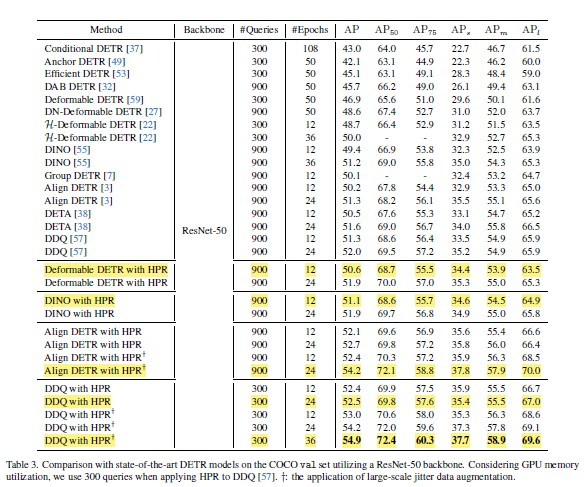

In [6]:
from IPython.display import Image
Image(filename="Comp_table_paper.jpg", width=900, height=600)

# Conclusion:
The HPR consistently improves performance across various DETR models, achieving a significant boost in Average Precision. For example, applying HPR with large-scale jitter data augment to DDQ achieved an AP of 54.2 on COCO using a ResNet-50 backbone with a 24-epoch training schedule, an improvement on the 52.0 on the standard DDQ with 24-epoch training. While the paper addresses many limitations of existing approaches, future work could explore optimizing computational efficiency, expanding to larger datasets, and adapting the framework for real-time or resource-constrained environments. Overall, the paper makes significant contributions to object detection research, paving the way for further advancements in detection performance and practical deployment.